#1. Specify the question and project goal


### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

The task is to predict whether a customer will leave the bank soon


### b) Defining the Metric for Success

What will convince you that your project has succeeded?

a model with corrected imabalance and F1 score of 0.59 or higher

### c) Understanding the context 

The background information surrounding the problem or research question.

The data is collected and shared by a bank whos aim is to predict with high accuracy a customers likelihood to leave the bank. the bank aims to invest in keeping its currrent clients from leaving 


### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.

Data collection, cleaning and understanding, followed by creating a model, training and testing it, reviewing the outcome, adjusting paraemeters and class imbalance and challenging the results.

### e) Data Relevance

Is your data relevant to the problem or research question?

Yes, the data provided is relevant, as these are the key factors in determining a customers exit

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

Step 1: Load libraries and import data

In [2]:
#Loading libraries
import pandas as pd

Step 2: Import dataset and explore

In [3]:
#Import data and explore

df=pd.read_csv('https://bit.ly/2XZK7Bo')

df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8077,8078,15741693,Barnard,693,France,Male,40,4.0,130661.96,1,1,1,101918.96,0
2169,2170,15621629,Scott,773,Germany,Male,43,8.0,81844.91,2,1,1,35908.46,0
2716,2717,15631170,Clements,695,France,Male,45,3.0,0.00,2,1,1,30793.61,0
6207,6208,15665811,Parry,644,France,Male,33,9.0,141234.98,1,1,0,95673.05,0
6862,6863,15736287,Piccio,586,France,Male,33,9.0,0.00,1,1,0,6975.02,0
4284,4285,15740175,Raynor,732,Germany,Female,42,2.0,118889.66,2,0,0,87422.15,0
653,654,15664610,Campbell,459,Germany,Male,48,4.0,133994.52,1,1,1,19287.06,1
784,785,15571221,Bergamaschi,747,Germany,Male,58,7.0,116313.57,1,1,1,190696.35,1
3983,3984,15814092,Wang,626,France,Female,44,2.0,0.00,1,0,1,173117.22,1
2787,2788,15700487,Osonduagwuike,805,France,Male,46,6.0,118022.06,3,1,0,162643.15,1


In [4]:
#preview the dataset shape
df.shape

(10000, 14)

In [5]:
#look for duplicates
sum(df.duplicated())
# ther are no duplicated records in the dataset

0

In [6]:
#look for missing values
df.isnull().sum()

#tenure column has 909 null values

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
#we will replace the 909 values in the tenure column with 0 for encoding later

df.fillna(0, inplace = True)
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#preview datatypes
df.dtypes

#label encoding will be requires since there are 3 columns with text values

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
#we must convert the object columns to strings or integers to enable encoding
df['Surname'] = df['Surname'].astype(str)
df['Geography'] = df['Geography'].astype(str)
df['Gender'] = df['Gender'].astype(str)

df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
  if df[column_name].dtype == 'object':
     df[column_name] = le.fit_transform(df[column_name])
  else:
    pass


In [12]:
df.dtypes
# we were able to encode the 3 string columns

RowNumber            int64
CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## <font color='#2F4F4F'>3. Examine balance of Classes</font>



In [13]:
#we will examine the balance of classes by doing a value count
# of both outcomes and visualising the same

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

NameError: ignored

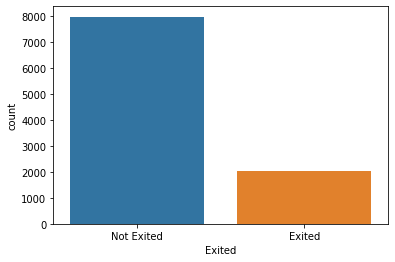

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#plot the graph
a = sns.countplot(df['Exited'])
a.set_xticklabels(['Not Exited','Exited'])
plt.show()



There is a clear class imbalance with majority of observations sitting under 'Not Exited' category. This will be resolved with Upsampling and Downsampling methods

## <font color='#2F4F4F'>4. Modelling</font>

We will model the exit data without adjusting for imbalance

Splitting the dataset into test, validation and training sets

In [17]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=12345)

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

In [23]:
print(features_test.shape)
print(target_test.shape)

(2500, 13)
(2500,)


Now split the training dataset into training and validation data

In [19]:
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

In [24]:
print(features_train.shape)
print(target_train.shape)

(5625, 13)
(5625,)


In [25]:
print(features_valid.shape)
print(target_valid.shape)

# dataset split into 25% test data and 75% training data that was then further 
#split into 75% training data and 25% validating data 

(1875, 13)
(1875,)


# Training the models without accounting for imbalance

1.Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree_model = DecisionTreeClassifier(random_state=12345, max_depth = 20)
tree_model.fit(features_train, target_train)

#convert features_valid to series to a 1d array for the prediction to work
predicted_valid = pd.Series(tree_model.predict(features_valid))

# compares predicted values vs actual values to determine accuracy of the model
f1_tree = f1_score(predicted_valid,target_valid)

print(f1_tree)

#F1 score of 52% without adjustment

0.5242966751918159


2.Linear Regression Model

In [29]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=12345,solver='liblinear')
#train the model
lr_model.fit(features_train,target_train)

#See the model's accuracy, call the score() method:
linear_predictions= lr_model.predict(features_valid)
linear_answers= target_valid

# compares predicted values vs actual values to determine accuracy of the model
f1_linear = f1_score(linear_predictions,linear_answers)

print(f1_linear)

#F1 score of 0% without adjustment

0.0


Observations:

Trained models without accounting for the class imbalance lead to low to 0 F1 scores. 
Decision tree classifier model produces a 0.52 F1 score, while regression models produce 0.0 F1 scores. 

# 5. Fixing the Class imbalance

Method 1: Upsampling

In [31]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


# create function to seperate the exited and non exited and combine using concat function.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
#sguffle the data
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)


model1 = LogisticRegression(random_state=12345, solver='liblinear')
model1.fit(features_upsampled, target_upsampled)
predicted_valid = model1.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.3370288248337029


Upsamling with decision tree classifier

In [32]:
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# create function to seperate the exited and non exited and combine using concat function.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
#sguffle the data
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)


model2 = DecisionTreeClassifier(random_state=12345, max_depth = 20)
model2.fit(features_upsampled, target_upsampled)
predicted_valid = model2.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.517766497461929


Method 2: Downsampling

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# create function to seperate the exited and non exited and combine using concat function.
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

# < write code here >
#model3 = LogisticRegression(random_state=12345, solver='liblinear')
#model3.fit(features_downsampled, target_downsampled)
#predicted_valid = model3.predict(features_valid)

#print('F1:', f1_score(target_valid, predicted_valid))

model3 = LogisticRegression(random_state=12345)
solvers = ['newton-cg', 'lbfgs', 'liblinear']

# define grid search
grid = dict(solver=solvers)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(features_valid,target_valid)

# summarize results
print("Best F1: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best F1: 0.275763 using {'solver': 'newton-cg'}


In [39]:
# create function to seperate the exited and non exited and combine using concat function.
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

# < write code here >
for depth in range(1, 20):
        model4 = DecisionTreeClassifier(random_state=12345,max_depth=depth)

        model4.fit(features_downsampled, target_downsampled)# < train the model >

        predictions_valid = model4.predict(features_valid)# < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(f1_score(target_valid, predictions_valid))



max_depth = 1 : 0.3370288248337029
max_depth = 2 : 0.506896551724138
max_depth = 3 : 0.4242424242424242
max_depth = 4 : 0.42332361516034983
max_depth = 5 : 0.47813411078717205
max_depth = 6 : 0.4508670520231214
max_depth = 7 : 0.45614035087719296
max_depth = 8 : 0.43282594308405026
max_depth = 9 : 0.4449035812672177
max_depth = 10 : 0.4144869215291751
max_depth = 11 : 0.42866894197952216
max_depth = 12 : 0.4304318026045236
max_depth = 13 : 0.42907058001397624
max_depth = 14 : 0.4220558202859088
max_depth = 15 : 0.42489851150202984
max_depth = 16 : 0.42489851150202984
max_depth = 17 : 0.42489851150202984
max_depth = 18 : 0.42489851150202984
max_depth = 19 : 0.42489851150202984


Observations#
On tuning parameters and determining the ones that give the best F1 score of 0.517 after adjusting for class imbalances are the Decision Tree Classifier model using a max _depth of 2 and accounting fot the imbalnces using upsampling. 

# 6. Final Testing: Using Testing data and Upsampling to adjust for imbalances, model type Decision tree classifier

In [58]:
# create function to seperate the exited and non exited and combine using concat function.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
#sguffle the data
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)


model2 = DecisionTreeClassifier(random_state=12345, max_depth = 27)
model2.fit(features_upsampled, target_upsampled)
predicted_test = model2.predict(features_test)

print('F1:', f1_score(target_test, predicted_test))

F1: 0.4717348927875244


### Conclusion: With the decision treee classifier, and a max depth of 27, the highest F1 score we are able to achieve for the testing data is 0.47